# Hugging Face Library Overview

In [1]:
import torch
import pprint

## Datasets

In [2]:
!pip install -qU datasets==2.20.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.5.0 which is incompatible.


In [3]:
from datasets import load_dataset

In [4]:
# 데이터 로딩
dataset = load_dataset("virattt/financial-qa-10K")
dataset

Generating train split:   0%|          | 0/7000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'context', 'ticker', 'filing'],
        num_rows: 7000
    })
})

In [5]:
dataset['train'][0:2]

{'question': ['What area did NVIDIA initially focus on before expanding to other computationally intensive fields?',
  'What are some of the recent applications of GPU-powered deep learning as mentioned by NVIDIA?'],
 'answer': ['NVIDIA initially focused on PC graphics.',
  'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.'],
 'context': ['Since our original focus on PC graphics, we have expanded to several other large and important computationally intensive fields.',
  'Some of the most recent applications of GPU-powered deep learning include recommendation systems, which are AI algorithms trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions, large language models, which can recognize, summarize, translate, predict and generate text and other content based on knowledge gained from massive datasets, and generative AI, wh

In [6]:
# split 지정해서 로딩
dataset = load_dataset("virattt/financial-qa-10K", split='train')
dataset

Dataset({
    features: ['question', 'answer', 'context', 'ticker', 'filing'],
    num_rows: 7000
})

In [7]:
dataset[0:2]

{'question': ['What area did NVIDIA initially focus on before expanding to other computationally intensive fields?',
  'What are some of the recent applications of GPU-powered deep learning as mentioned by NVIDIA?'],
 'answer': ['NVIDIA initially focused on PC graphics.',
  'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.'],
 'context': ['Since our original focus on PC graphics, we have expanded to several other large and important computationally intensive fields.',
  'Some of the most recent applications of GPU-powered deep learning include recommendation systems, which are AI algorithms trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions, large language models, which can recognize, summarize, translate, predict and generate text and other content based on knowledge gained from massive datasets, and generative AI, wh

In [8]:
# 출력 포맷 설정: 친숙한 판다스로
dataset = load_dataset("virattt/financial-qa-10K")
dataset.set_format(type='pandas')

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'context', 'ticker', 'filing'],
        num_rows: 7000
    })
})

In [10]:
dataset['train'][0:2]

,question,answer,context,ticker,filing
0,What area did NVIDIA initially focus on before...,NVIDIA initially focused on PC graphics.,"Since our original focus on PC graphics, we ha...",NVDA,2023_10K
1,What are some of the recent applications of GP...,Recent applications of GPU-powered deep learni...,Some of the most recent applications of GPU-po...,NVDA,2023_10K


In [11]:
dataset['train'].shape

(7000, 5)

In [12]:
train = dataset['train'][:5000]
valid = dataset['train'][5000:6500]
test = dataset['train'][6500:]

type(train), train.shape, valid.shape, test.shape

(pandas.core.frame.DataFrame, (5000, 5), (1500, 5), (500, 5))

In [13]:
# reset format
dataset.reset_format()
dataset['train'][:2]

{'question': ['What area did NVIDIA initially focus on before expanding to other computationally intensive fields?',
  'What are some of the recent applications of GPU-powered deep learning as mentioned by NVIDIA?'],
 'answer': ['NVIDIA initially focused on PC graphics.',
  'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.'],
 'context': ['Since our original focus on PC graphics, we have expanded to several other large and important computationally intensive fields.',
  'Some of the most recent applications of GPU-powered deep learning include recommendation systems, which are AI algorithms trained to understand the preferences, previous decisions, and characteristics of people and products using data gathered about their interactions, large language models, which can recognize, summarize, translate, predict and generate text and other content based on knowledge gained from massive datasets, and generative AI, wh

In [14]:
from datasets import Dataset, DatasetDict

In [15]:
# DatasetDict로 합치기
new_dataset = DatasetDict({
    'train':  Dataset.from_pandas(train),
    'valid':  Dataset.from_pandas(valid),
    'test':  Dataset.from_pandas(test)
})

# 결과 확인
print(new_dataset)

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'context', 'ticker', 'filing'],
        num_rows: 5000
    })
    valid: Dataset({
        features: ['question', 'answer', 'context', 'ticker', 'filing'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['question', 'answer', 'context', 'ticker', 'filing'],
        num_rows: 500
    })
})


In [16]:
# split, row
pprint.pprint(new_dataset['train'][0])
pprint.pprint(new_dataset['valid'][0])
pprint.pprint(new_dataset['test'][0])

{'answer': 'NVIDIA initially focused on PC graphics.',
 'context': 'Since our original focus on PC graphics, we have expanded to '
            'several other large and important computationally intensive '
            'fields.',
 'filing': '2023_10K',
 'question': 'What area did NVIDIA initially focus on before expanding to '
             'other computationally intensive fields?',
 'ticker': 'NVDA'}
{'answer': 'The factors that significantly affect the sales and earnings of a '
           'vehicle manufacturer include the ability to satisfy changing '
           'consumer and business preferences regarding the type or size of '
           'vehicle, design and performance characteristics, and the services '
           'offered by the vehicles.',
 'context': 'Our ability to satisfy changing consumer and business preferences '
            'with respect to type or size of vehicle, as well as design and '
            'performance characteristics and the services our vehicles offer, '
      

In [17]:
# split, feature
new_dataset['train']['ticker']

['NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'NVDA',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 'AAPL',
 

In [18]:
# split, row, feature
new_dataset['train'][0:2]['answer']

['NVIDIA initially focused on PC graphics.',
 'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.']

In [19]:
# split, feature, row
new_dataset['train']['answer'][0:2]

['NVIDIA initially focused on PC graphics.',
 'Recent applications of GPU-powered deep learning include recommendation systems, large language models, and generative AI.']

## Transformers

### Encoder Model: Bert

- Official Tutorial : https://huggingface.co/learn/nlp-course/chapter1/5

#### 특정 모델 클래스로부터 로딩

In [20]:
from transformers import DistilBertTokenizer, DistilBertModel

In [21]:
# model id
model_ckpt = "distilbert/distilbert-base-cased"

tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### Tokenizer

In [22]:
text = [
        "How are you?",
        "Hi",
        "안녕하세요?"
    ]
encoded_input = tokenizer(
    text,
    return_tensors="pt", padding=True)

pprint.pprint(encoded_input)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0]]),
 'input_ids': tensor([[ 101, 1731, 1132, 1128,  136,  102],
        [ 101, 8790,  102,    0,    0,    0],
        [ 101,  100,  136,  102,    0,    0]])}


In [23]:
# encode: sentence -> token ids
tokenizer.encode(text[0], return_tensors='pt'),\
tokenizer.encode(text[1], return_tensors='pt'),\
tokenizer.encode(text[2], return_tensors='pt')


(tensor([[ 101, 1731, 1132, 1128,  136,  102]]),
 tensor([[ 101, 8790,  102]]),
 tensor([[101, 100, 136, 102]]))

In [24]:
# convert_ids_to_tokens: token ids -> tokens
# 한글은 [UNK]로 통째로 모르는 토큰 하나로 처리
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0]))
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][1]))
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][2]))

['[CLS]', 'How', 'are', 'you', '?', '[SEP]']
['[CLS]', 'Hi', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', '[UNK]', '?', '[SEP]', '[PAD]', '[PAD]']


In [25]:
# decode: token ids -> sentence
pprint.pprint(tokenizer.decode(encoded_input['input_ids'][0]))
pprint.pprint(tokenizer.decode(encoded_input['input_ids'][1]))
pprint.pprint(tokenizer.decode(encoded_input['input_ids'][2]))

'[CLS] How are you? [SEP]'
'[CLS] Hi [SEP] [PAD] [PAD] [PAD]'
'[CLS] [UNK]? [SEP] [PAD] [PAD]'


In [26]:
# 다국어 지원 모델
model_ckpt = 'distilbert/distilbert-base-multilingual-cased'
tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

encoded_input = tokenizer(
    text,
    return_tensors="pt", padding=True)

pprint.pprint(encoded_input)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[   101,  14962,  10301,  13028,    136,    102,      0,      0],
        [   101,  20065,    102,      0,      0,      0,      0,      0],
        [   101,   9521, 118741,  35506,  24982,  48549,    136,    102]])}


In [27]:
#
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0]))
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][1]))
pprint.pprint(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][2]))

['[CLS]', 'How', 'are', 'you', '?', '[SEP]', '[PAD]', '[PAD]']
['[CLS]', 'Hi', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', '안', '##녕', '##하', '##세', '##요', '?', '[SEP]']


In [28]:
# 모델 가져오기
model = DistilBertModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

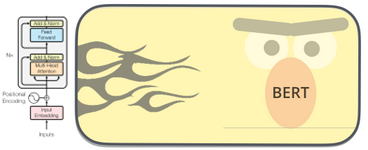

In [29]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [30]:
output = model(**encoded_input)

# (batch, seq, d_model)
output['last_hidden_state'].shape

torch.Size([3, 8, 768])

#### AutoModel을 이용한 로딩

In [31]:
from transformers import AutoModel, AutoTokenizer

In [32]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

#### 특정 태스크 헤드가 있는 상태로 로딩

##### Masked LM

In [33]:
from transformers import DistilBertForMaskedLM, AutoModelForMaskedLM

In [34]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# model = DistilBertForMaskedLM.from_pretrained(model_ckpt)
model = AutoModelForMaskedLM.from_pretrained(model_ckpt)

model

DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0

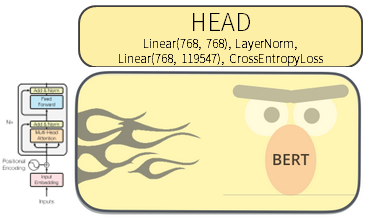

In [35]:
# https://huggingface.co/docs/transformers/tasks/masked_language_modeling

samples = ["The capital of France is [MASK].", "프랑스의 수도는 [MASK] 이다.",
           "The capital of Korea is [MASK].", "한국의 수도는 [MASK] 이다."]

inputs = tokenizer(
    samples, return_tensors="pt", padding=True)
pprint.pprint(inputs)

with torch.no_grad():
    outputs = model(**inputs)
print("\nlogit shape")
logits = outputs.logits
print(logits.shape)

# retrieve index of [MASK]
mask_token_index = torch.where( (inputs.input_ids == tokenizer.mask_token_id)==True)[1]

# 마스크 자리의 출력중에 제일 값이 큰것
predicted_token_id = logits[torch.arange(len(samples)), mask_token_index].argmax(axis=-1)
print(predicted_token_id)
print(tokenizer.convert_ids_to_tokens(predicted_token_id))

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[   101,  10117,  12185,  10108,  10688,  10124,    103,    119,    102],
        [   101, 105787,  69283,  11018,    103,  30919,    119,    102,      0],
        [   101,  10117,  12185,  10108,  14096,  10124,    103,    119,    102],
        [   101,  48556,  10459,  69283,  11018,    103,  30919,    119,    102]])}

logit shape
torch.Size([4, 9, 119547])
tensor([10728,  9940, 26335,  9638])
['Paris', '풍', 'Seoul', '이']


In [36]:
# [참고] 한국어에다 다시 학습한 distiled-bert 모델을 실험
tokenizer_kor_model = AutoTokenizer.from_pretrained('bongsoo/mdistilbertV3.1')
model = DistilBertForMaskedLM.from_pretrained('bongsoo/mdistilbertV3.1')

inputs = tokenizer_kor_model(
    samples, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits

mask_token_index = torch.where( (inputs.input_ids == tokenizer_kor_model.mask_token_id)==True)[1]
predicted_token_id = logits[torch.arange(len(samples)), mask_token_index].argmax(axis=-1)
print(predicted_token_id)
print(tokenizer_kor_model.convert_ids_to_tokens(predicted_token_id))

tokenizer_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.95M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/665M [00:00<?, ?B/s]

tensor([ 14624, 120205,  95094,  48253])
['common', '파리', 'reserved', '서울']


##### Sequence Classifier

In [37]:
from transformers import DistilBertForSequenceClassification

In [38]:
model = DistilBertForSequenceClassification.from_pretrained(
    model_ckpt,
    num_labels=3
)

# 클래스 3개로 분류하는 후속 태스크는 미리 학습되지 않았기 때문에
# 학습 후 사용해야 한다는 워닝이 뜸
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


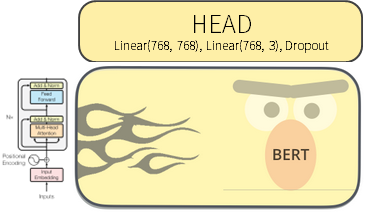

### Decoder Model: gpt2

- Official Tutorial: https://huggingface.co/learn/nlp-course/chapter1/6

In [39]:
model_ckpt = "openai-community/gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

model

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

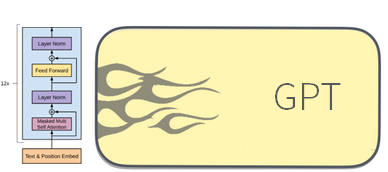

##### Causal LM

In [40]:
from transformers import GPT2LMHeadModel, AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("gpt2")
# model = GPT2LMHeadModel.from_pretrained("gpt2")
model

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

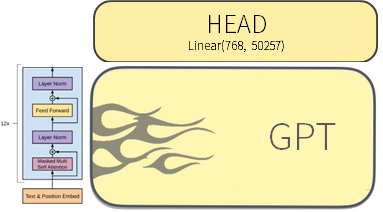

In [41]:
prompt = "GPT2 is a model developed by OpenAI. It"
inputs = tokenizer(prompt, return_tensors="pt")

# 단어앞에 공백이 별도 토큰으로 토큰화 되지않고 'Ġis'처럼 한덩어리로 토큰화 됨
print(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

['G', 'PT', '2', 'Ġis', 'Ġa', 'Ġmodel', 'Ġdeveloped', 'Ġby', 'ĠOpen', 'AI', '.', 'ĠIt']


In [42]:
outputs = model(**inputs)
logits = outputs.logits
print(logits.shape)

# 0번 샘플이 마지막 토큰자리 출력중 제일 큰 인덱스
predicted_token_id = logits[0, -1].argmax(axis=-1)
print(predicted_token_id)
print(tokenizer.convert_ids_to_tokens([predicted_token_id]))
tokenizer.decode(predicted_token_id)

torch.Size([1, 12, 50257])
tensor(318)
['Ġis']


' is'

In [43]:
gen_tokens = model.generate(
    **inputs,
    do_sample=True,
    temperature=0.9,
    max_length=100,
    pad_token_id=tokenizer.eos_token_id # gpt는 pad 토큰이 없어서 경고가 나는데 경고 없애기 위해...
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]
print(gen_text)

GPT2 is a model developed by OpenAI. It makes artificial intelligence (AI) possible with high performance computing.

The current generation of C++ engines, the C++10 platform, have been developed by OpenAI

The OpenAI Deep Learning Model based on the OpenAI API (OpenAI) was created for OpenAI. The new C++ engine makes C++ language for Deep Learning possible in C++

The OpenAI Platform is aimed at supporting full-stack applications


### Encoder-Decoder Model: T5

- Official Tutorial : https://huggingface.co/learn/nlp-course/chapter1/7

In [44]:
from transformers import AutoModel, AutoTokenizer

In [45]:
from transformers import T5Model

# model_ckpt_t5 = "google-t5/t5-small"
model_ckpt_t5 = "google-t5/t5-large"
tokenizer_t5 = AutoTokenizer.from_pretrained(model_ckpt_t5)

# model = T5Model.from_pretrained(model_ckpt)
model_t5 = AutoModel.from_pretrained(model_ckpt_t5)

model_t5

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

T5Model(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (dropout): Dropout(p=

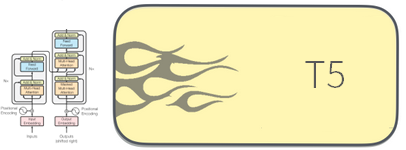

In [46]:
encoder_input_texts = [
    "Complete the following sentence: After school, he went to the park to",
    "Complete the following sentence: She was so tired that she decided to"
]

target_texts = [
    "play with his friends.",
    "go to bed early."
]

# 인코더 입력을 토큰화 및 인코딩
encoder_inputs = tokenizer_t5(encoder_input_texts,
                           return_tensors="pt",
                           padding=True)

# 정답 문장을 토큰화 및 인코딩
decoder_targets = tokenizer_t5(target_texts,
                           return_tensors="pt",
                           padding=True)

In [47]:
# 입력 문장을 디코딩
print(tokenizer_t5.decode(encoder_inputs["input_ids"][0]))
print(tokenizer_t5.decode(encoder_inputs["input_ids"][1]))

Complete the following sentence: After school, he went to the park to</s>
Complete the following sentence: She was so tired that she decided to</s><pad><pad>


In [48]:
# 정답 문장을 디코딩
print(tokenizer_t5.decode(decoder_targets["input_ids"][0]))
print(tokenizer_t5.decode(decoder_targets["input_ids"][1]))

play with his friends.</s>
go to bed early.</s>


In [49]:
# 정답 문장을 오른쪽으로 쉬프트 시켜 디코더 인풋 준비
# 1이 종료 토큰: </s>
print(decoder_targets['input_ids'])

decoder_inputs = model_t5._shift_right(decoder_targets['input_ids'])
# 0이 시작 토큰: <pad>
decoder_inputs

tensor([[ 577,   28,  112,  803,    5,    1],
        [ 281,   12, 1953,  778,    5,    1]])


tensor([[   0,  577,   28,  112,  803,    5],
        [   0,  281,   12, 1953,  778,    5]])

In [50]:
# 디코더 인풋을 디코딩
print(tokenizer_t5.decode(decoder_inputs[0]))
print(tokenizer_t5.decode(decoder_inputs[1]))

<pad> play with his friends.
<pad> go to bed early.


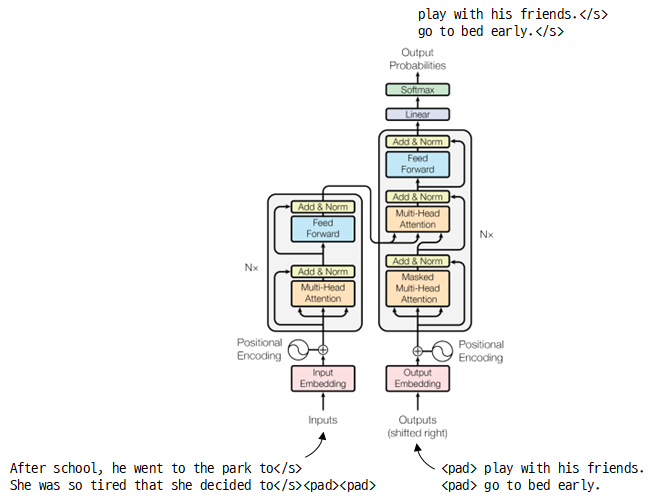

In [51]:
# 모델에 입력을 넣어 디코더의 hidden_state 출력 계산
outputs = model_t5(
    input_ids=encoder_inputs['input_ids'],
    decoder_input_ids=decoder_inputs)

outputs['last_hidden_state'].shape


torch.Size([2, 6, 1024])

- 이 hidden_state를 시퀀스로 디코딩하기 위해 헤더가 붙어 있는 모델을 다시 로딩

##### Sequence to Sequence LM

In [52]:
from transformers import T5ForConditionalGeneration, AutoModelForSeq2SeqLM

# model_t5_seq2seq = T5ForConditionalGeneration.from_pretrained(model_ckpt_t5)
model_t5_seq2seq = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt_t5)


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [53]:
model_t5_seq2seq

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

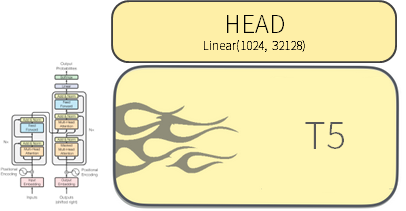

In [54]:
outputs = model_t5_seq2seq(
    input_ids=encoder_inputs['input_ids'],
    decoder_input_ids=decoder_inputs)

logits = outputs.logits
print(logits.shape)

# 출력 토큰을 디코딩하여 텍스트로 변환
decoded_outputs = tokenizer_t5.decode(outputs.logits.argmax(-1)[0])
# 결과 출력
print("Predicted output:", decoded_outputs)

decoded_outputs = tokenizer_t5.decode(outputs.logits.argmax(-1)[1])
# 결과 출력
print("Predicted output:", decoded_outputs)

torch.Size([2, 6, 32128])
Predicted output: <extra_id_0> with the friends. Complete
Predicted output: <extra_id_0>r the   


In [55]:
# inference

input_ids = tokenizer_t5("translate English to German: The house is wonderful.", return_tensors="pt").input_ids
outputs = model_t5_seq2seq.generate(input_ids, max_new_tokens=100)

print(tokenizer_t5.decode(outputs[0], skip_special_tokens=True))

Das Haus ist wunderbar.


#### Flan-T5

- 연속적으로 실행했다면 여기서 세션 다시 시작

In [1]:
from transformers import AutoModel, AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

model_ckpt_flant5 = "google/flan-t5-large"

model_flant5_seq2seq = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt_flant5)
tokenizer_flant5 = AutoTokenizer.from_pretrained(model_ckpt_flant5)


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
model_flant5_seq2seq

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=1024, out_features=2816, bias=False)
              (wi_1): Linear(in_features=1024, out_features=2816, bias=False)
       

In [3]:
encoder_input_texts = [
    "Complete the following sentence: After school, he went to the park to",
    "Complete the following sentence: She was so tired that she decided to"
]

target_texts = [
    "play with his friends.",
    "go to bed early."
]

# 인코더 입력을 토큰화 및 인코딩
encoder_inputs = tokenizer_flant5(encoder_input_texts,
                           return_tensors="pt",
                           padding=True)

# 정답 문장을 토큰화 및 인코딩
decoder_targets = tokenizer_flant5(target_texts,
                           return_tensors="pt",
                           padding=True)

In [4]:
# 정답 문장을 오른쪽으로 쉬프트 시켜 디코더 인풋 준비
# 1이 종료 토큰: </s>
print(decoder_targets['input_ids'])

decoder_inputs = model_flant5_seq2seq._shift_right(decoder_targets['input_ids'])
# 0이 시작 토큰: <pad>
decoder_inputs

tensor([[ 577,   28,  112,  803,    5,    1],
        [ 281,   12, 1953,  778,    5,    1]])


tensor([[   0,  577,   28,  112,  803,    5],
        [   0,  281,   12, 1953,  778,    5]])

In [5]:
outputs = model_flant5_seq2seq(
    input_ids=encoder_inputs['input_ids'],
    decoder_input_ids=decoder_inputs)

logits = outputs.logits
print(logits.shape)

# # 출력 토큰을 디코딩하여 텍스트로 변환
decoded_outputs = tokenizer_flant5.decode(outputs.logits.argmax(-1)[0])
# # 결과 출력
print("Predicted output:", decoded_outputs)

decoded_outputs = tokenizer_flant5.decode(outputs.logits.argmax(-1)[1])
# # 결과 출력
print("Predicted output:", decoded_outputs)

# 정답
# play with his friends.</s>
# go to bed early.</s>

torch.Size([2, 6, 32128])
Predicted output: play with his friends.</s>
Predicted output: sleep to bed early.</s>
